# Basic Imports

In [1]:
import pandas as pd
import numpy as np

# For charts
import matplotlib.pyplot as plt
import seaborn as sns

# Opening a file

In [2]:
file_path = 'marketing_data.csv'
dict_path = 'marketing_data_dictionary.csv'

# Import the dataset
df = pd.read_csv(file_path)
dict = pd.read_csv(dict_path)

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Some basic functionality

This is all to look at your stuff, get a base understanding

`df`

`df['col name']` , `df['col name', 'col2 name']`
`df.iloc[x:y:z]` x = start, y = end , z = every zth row (x+z+z+z+... until (x+z)>y ) 

`df.head()`

`df.tail()`

`df.shape`

`df.info()`

`df.describe()`

`df.isnull().sum())`       

`df['Income'].isnull()` , `df[df['Income'].isnull()]`

`df.drop(['col1', 'col2', 'col3'], axis = 1, inplace = True)`   # Dropping columns you dont want, inplace = true means it changes the df 

`a = df.drop(['col1', 'col2', 'col3'], axis = 1)`  # ^ This is the alternative, you make a new variable to hold the df without the columns

# Gotta fix missing values

Drop rows with missing values
`df.dropna(inplace=True)`

Replace missing values in 'Income' with the mean of the column

`df['Income'].fillna(df['Income'].mean(), inplace=True)`

In [3]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_25096\2923762628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


# You'd want to split numericals & categoricals

Some stuff doesent work for both numericals & categoricals, so this is how u can split them

In [4]:
# Select numerical columns (integers and floats)
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Select categorical columns (object and potentially 'category' dtypes if you've converted any)
categorical_df = df.select_dtypes(include=['object', 'category'])

In [5]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [6]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2240 non-null   object
 1   Marital_Status  2240 non-null   object
 2   Dt_Customer     2240 non-null   object
 3   Country         2240 non-null   object
dtypes: object(4)
memory usage: 70.1+ KB


# Then can kinda do whatever

In [7]:
# Dropping a column:
categorical_df = categorical_df.drop(columns='Dt_Customer')
df = df.drop(columns='Dt_Customer')

# Gonna create a few functions, can grab these for future use

Defining functions here, scroll down after all the functions in order to see some use.

In [8]:
def visualize_numerical(df):
    for column in df.columns:
        fig, ax = plt.subplots(1, 2, figsize=(14, 4))
        
        # Histogram
        sns.histplot(df[column], bins=30, ax=ax[0], kde=True)
        ax[0].set_title(f'Histogram of {column}')
        
        # Boxplot
        sns.boxplot(x=df[column], ax=ax[1])
        ax[1].set_title(f'Boxplot of {column}')
        
        plt.tight_layout()
        plt.show()

In [9]:
def visualize_categorical(df):
    for column in df.columns:
        plt.figure(figsize=(10, 4))
        
        # Bar chart
        sns.countplot(y=df[column], order = df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.tight_layout()
        plt.show()

In [10]:
def plot_normalized_distribution_by_target(df, target_column, diff_threshold=0):
    """
    Generate bar plots for each categorical column in the DataFrame, excluding the target column.
    Plots are normalized with respect to the target column, highlighting distributions where
    the difference exceeds a specified threshold.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target column to normalize against and exclude from plotting.
    - diff_threshold: The percentage difference threshold for highlighting distributions.
    """
    # Select categorical columns, excluding the target column
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        # Normalizing counts
        x, y = col, target_column
        df_normalized = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

        # Assuming binary target column with numeric values, convert them to str for visualization
        df_normalized[y] = df_normalized[y].astype(str)
        
        # Plotting
        plt.figure(figsize=(10,4))
        p = sns.barplot(x=x, y='percent', hue=y, data=df_normalized)
        
        # Add labels to the plot
        for rect in p.patches:
            height = rect.get_height()
            p.text(rect.get_x() + rect.get_width() / 2., height, f'{round(height,2)}%', 
                    ha='center', va='bottom')

        plt.title(f'Normalized Distribution of {col} by {target_column}')
        plt.xticks(rotation=90)
        plt.show()

In [11]:
def plot_correlation_heatmap(df):
    """
    Generates a heatmap visualizing the correlation matrix of numerical columns in the DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    """
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()


# Now lets see the functions above

In [12]:
#visualize_numerical(numerical_df)

#visualize_categorical(categorical_df)


#plot_normalized_distribution_by_target(df, 'Response')

In [13]:
#plot_correlation_heatmap(df)
#sns.clustermap(numerical_df.corr(), annot=True, cmap='coolwarm', figsize=(15,15))

# Some machine learning related stuff 

sklearn imports are more case-specific, so I'm pairing them with the functions where I'm using them.

## Once again, making functions to grab/use

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def create_basic_logistic_regression_auto_features(df, target_feature, test_size=0.2, random_state=0, max_iter=500):
    """
    Creates a logistic regression model based on the provided DataFrame and target feature.
    Automatically selects predictive features as all columns except the target.
    Splits the data, scales numeric features, and fits the logistic regression model.
    
    Parameters:
    - df: DataFrame containing the data.
    - target_feature: Name of the target feature column.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Seed used by the random number generator for reproducible output.
    - max_iter: Maximum number of iterations taken for the solvers to converge.
    
    Returns:
    - model: Trained logistic regression model.
    - X_train, X_test, y_train, y_test: Training and testing datasets.
    """
    # Automatically define predictive features as all columns except the target feature
    predictive_features = [col for col in df.columns if col != target_feature]
    
    # Divide data into features and target
    X = df[predictive_features]
    y = df[target_feature]
    
    # Divide data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Select only numeric columns for scaling
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns
    
    # Initialize and fit the StandardScaler on numeric columns
    scaler = StandardScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
    
    # Initialize and fit the logistic regression model on scaled numeric features
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train[numeric_cols], y_train)
    
    return model, X_train, X_test, y_train, y_test

In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    """
    Generates and plots a confusion matrix for the given model and test data.
    
    Parameters:
    - model: The trained machine learning model.
    - X_test: The test features.
    - y_test: The true labels for the test data.
    """
    # Predict classes using the model
    y_pred = model.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

In [16]:
def plot_logistic_regression_feature_importance(model, feature_names, top_n=30):
    """
    Plots the top N feature importances for a trained logistic regression model.
    
    Parameters:
    - model: The trained logistic regression model.
    - feature_names: The names of the features used to train the model.
    - top_n: The number of top features to display.
    """
    # Get importance coefficients from the model
    importance = model.coef_[0]

    # Create a DataFrame of features and their importance
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    # Take absolute value of coefficients for ranking
    feature_importance['abs_importance'] = feature_importance['Importance'].abs()

    # Sort by absolute importance and select top N features
    top_features = feature_importance.sort_values('abs_importance', ascending=False).iloc[:top_n]

    # Sort the top_features DataFrame in descending order by Importance for the plot
    top_features = top_features.sort_values('Importance', ascending=False)

    # Color based on positive or negative coefficient
    colors = ['green' if x > 0 else 'red' for x in top_features['Importance']]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(top_features['Feature'], top_features['Importance'], color=colors)
    plt.xticks(rotation=90)  # Changed to 90 for better label readability
    plt.title("Top {} Feature Importance".format(top_n))
    plt.ylabel("Coefficient")

    # Find the position of the first negative coefficient and draw a line
    first_negative = np.where(top_features['Importance']<0)[0]
    if len(first_negative) > 0:
        plt.axvline(x=first_negative[0]-0.5, color='black', linestyle='--')

    plt.show()

## Examples of the ML functions above

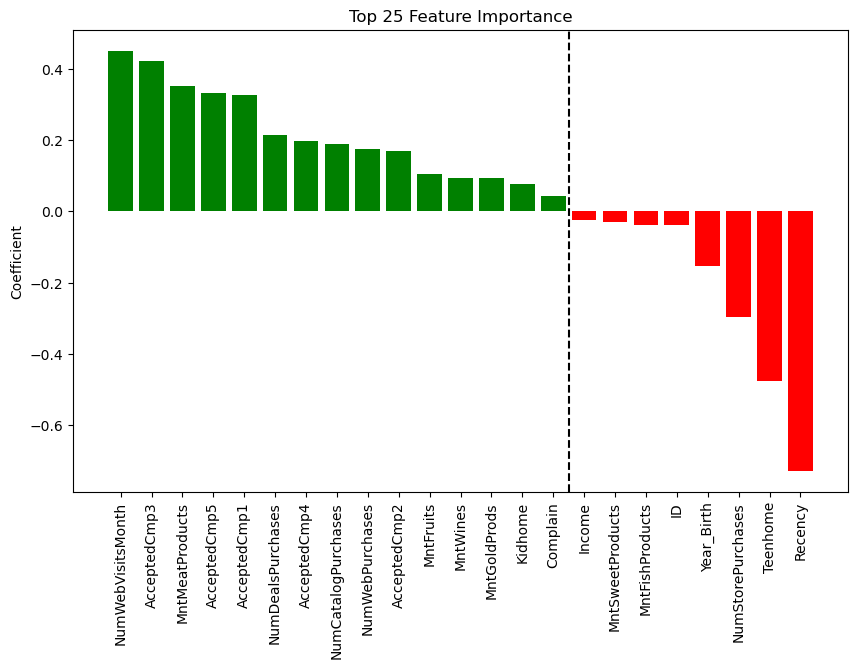

In [20]:
model, X_train, X_test, y_train, y_test = create_basic_logistic_regression_auto_features(df=numerical_df, target_feature='Response') # makes logreg model

#plot_confusion_matrix(model, X_test, y_test)              #shows model predict to real target
#print(classification_report(y_test, y_pred))              #More stats for above

plot_logistic_regression_feature_importance(model, X_train.columns, top_n=25)                                  #shows n features w/ highest

In [ ]:
def plot_vif_for_dataframe(df, target_feature, threshold=10):
    """
    Automatically selects predictive features as all columns except the target from the given DataFrame, 
    calculates VIF for each feature, and plots the features with VIF values below the specified threshold.
    
    Parameters:
    - df: DataFrame containing the data and the target feature.
    - target_feature: Name of the target feature column to exclude from VIF calculation.
    - threshold: The VIF value threshold for filtering features to plot.
    """
    # Exclude target feature and ensure only numeric features are considered
    X = df[[col for col in df.columns if col != target_feature and df[col].dtype != 'object']]
    
    # Initialize the VIF DataFrame
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    
    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    # Filter features based on the threshold
    filtered_vif = vif_data[vif_data['VIF'] <= threshold]
    
    # Sort the filtered VIF data
    final_vif = filtered_vif.sort_values('VIF').copy()
    
    # Assign colors based on VIF values
    final_vif['color'] = ['green' if vif <= 2 else 'orange' if vif <= 5 else 'red' for vif in final_vif['VIF']]
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(final_vif['feature'], final_vif['VIF'], color=final_vif['color'])
    plt.xticks(rotation='vertical')
    plt.title(f"Features with VIF Value Below {threshold}")
    plt.ylabel("VIF")
    plt.show()


In [ ]:
plot_vif_for_dataframe(df, target_feature='Response')

The bar chart above visualizes the VIF values of the selected features, color-coded for ease of interpretation:

**Green**: VIF <= 2, these features exhibit low multicollinearity and are solid candidates for inclusion in our model.

**Orange**: 2 < VIF <= 5, these features have moderate multicollinearity but can still be reasonably included in our model.

**Red**: 5 < VIF <= 10, these features show high multicollinearity. Their inclusion in the model could be considered, however, they could also be excluded if constraints such as model complexity or overfitting become an issue.

In [ ]:
def train_model_with_vif_threshold(df, target_feature, vif_threshold=10, test_size=0.2, random_state=0, max_iter=500):
    """
    Trains a logistic regression model on features below a specified VIF threshold.
    
    Parameters:
    - df: DataFrame containing the data and the target feature.
    - target_feature: Name of the target feature column.
    - vif_threshold: VIF value threshold for filtering features.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Seed used by the random number generator for reproducible output.
    - max_iter: Maximum number of iterations taken for the solvers to converge.
    
    Returns:
    - model: Trained logistic regression model.
    - X_train, X_test, y_train, y_test: Training and testing datasets based on filtered features.
    """
    # Exclude target feature and ensure only numeric features are considered
    X = df.drop(target_feature, axis=1)
    X = X.select_dtypes(include=[np.number])

    # Calculate VIF for each feature and filter based on the threshold
    vif_data = pd.DataFrame({
        "feature": X.columns,
        "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    features_below_threshold = vif_data[vif_data["VIF"] < vif_threshold]["feature"].tolist()
    
    # Prepare the filtered feature dataset and the target
    X_filtered = df[features_below_threshold]
    y = df[target_feature]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=test_size, random_state=random_state)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and fit the logistic regression model on the filtered and scaled features
    model = LogisticRegression(max_iter=max_iter, random_state=random_state)
    model.fit(X_train, y_train)
    
    return model, X_train, X_test, y_train, y_test

In [ ]:
model_vif, X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_model_with_vif_threshold(df=df, target_feature='Response', vif_threshold=5)

In [ ]:
plot_confusion_matrix(model_vif, X_test_vif, y_test_vif)



# Print classification report
#print(classification_report(y_test, y_pred))

#plot_logistic_regression_feature_importance(model, X_train.columns, top_n=30)

In [ ]:
# Bar plot of the target variable
sns.countplot(x='Response', data=df)

# Count the values of each class in the target variable
df = y.value_counts()

print("Churn value counts:")
print(churn_counts)